importing stuff and loading our dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price_edited.csv', encoding = 'latin1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


label encoding

In [39]:
print(data["Company"].unique())
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1

data["Company_converted"] = Company_names
le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])
print(data[['Company_converted', 'Company_Label']].head())

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'Lenovo' 'LG' 'Mediacom' 'Microsoft' 'MSI' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
  Company_converted  Company_Label
0              Acer              0
1              Acer              0
2              Acer              0
3              Acer              0
4              Acer              0


In [40]:
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands
print(data[["Gpu","Gpu_Brands"]].head())
le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])
print(data[['Gpu_Brands', 'Gpu_Brands_Label']].head())

1302
                      Gpu Gpu_Brands
0           AMD Radeon R5        AMD
1  Intel UHD Graphics 620      Intel
2   Intel HD Graphics 620      Intel
3  Intel UHD Graphics 620      Intel
4    Nvidia GeForce MX150     Nvidia
  Gpu_Brands  Gpu_Brands_Label
0        AMD                 0
1      Intel                 2
2      Intel                 2
3      Intel                 2
4     Nvidia                 3


In [41]:
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")
  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")
  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")

data["Cpu_Brands"] = Cpu_brands
print(data[["Cpu","Cpu_Brands"]].head())
le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])
print(data[['Cpu_Brands', 'Cpu_Brands_Label']].head())

                          Cpu Cpu_Brands
0     AMD A9-Series 9420 3GHz        AMD
1  Intel Core i5 8250U 1.6GHz    Core i5
2  Intel Core i3 7130U 2.7GHz    Core i3
3  Intel Core i5 8250U 1.6GHz    Core i5
4  Intel Core i7 8550U 1.8GHz    Core i7
  Cpu_Brands  Cpu_Brands_Label
0        AMD                 0
1    Core i5                 5
2    Core i3                 4
3    Core i5                 5
4    Core i7                 6


In [42]:
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1

data["TypeName_converted"] = Type_names
le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])
print(data[['TypeName_converted', 'TypeName_Label']].head())

['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
  TypeName_converted  TypeName_Label
0           Notebook               3
1          Ultrabook               4
2           Notebook               3
3           Notebook               3
4           Notebook               3


In [43]:
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

data["Ram_types"] = ram_types
print(data[["Ram","Ram_types"]].head())

['4GB' '8GB' '6GB' '12GB' '2GB' '16GB' '32GB' '24GB' '64GB']
   Ram Ram_types
0  4GB         4
1  8GB         8
2  4GB         4
3  4GB         4
4  8GB         8


In [44]:
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems
print(data[["OpSys","Operating_system"]].head())

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])
print(data[['OperatingSys_label', 'Operating_system']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

        OpSys Operating_system
0  Windows 10       Windows 10
1  Windows 10       Windows 10
2       Linux            Linux
3  Windows 10       Windows 10
4  Windows 10       Windows 10
   OperatingSys_label Operating_system
0                   5       Windows 10
1                   5       Windows 10
2                   2            Linux
3                   5       Windows 10
4                   5       Windows 10
Label mapping: {'Android': np.int64(0), 'Chrome OS': np.int64(1), 'Linux': np.int64(2), 'Mac OS': np.int64(3), 'No OS': np.int64(4), 'Windows 10': np.int64(5), 'Windows 7': np.int64(6)}


In [45]:
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)
print(data[['Memory', 'Memory_GB']].head())

      Memory  Memory_GB
0  500GB HDD      500.0
1  256GB SSD      256.0
2    1TB HDD     1000.0
3  256GB SSD      256.0
4  256GB SSD      256.0


In [46]:
data["Weight"] = data["Weight"].str.replace("kg", "")
data.drop("laptop_ID",axis = 1)
data.drop("Price_euros",axis = 1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_Brands,Gpu_Brands_Label,Cpu_Brands,Cpu_Brands_Label,TypeName_converted,TypeName_Label,Ram_types,Operating_system,OperatingSys_label,Memory_GB
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,...,AMD,0,AMD,0,Notebook,3,4,Windows 10,5,500.0
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Ultrabook,4,8,Windows 10,5,256.0
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,...,Intel,2,Core i3,4,Notebook,3,4,Linux,2,1000.0
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Notebook,3,4,Windows 10,5,256.0
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,8,Windows 10,5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,...,Intel,2,Atom,1,Notebook,3,4,Windows 10,5,32.0
1299,188,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Notebook,3,8,No OS,4,256.0
1300,196,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Ultrabook,4,8,No OS,4,256.0
1301,521,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,16,No OS,4,256.0


scaling data, making test train splits

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data[['Ram_types', 'Cpu_Brands_Label', 'Gpu_Brands_Label', 'OperatingSys_label', 'Memory_GB', 'Weight', 'Company_Label', 'TypeName_Label', 'Inches']]
y = data['Price_usd'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear regression

R-squared score: 0.63
Mean Absolute Error (MAE): 302.41
Mean Squared Error (MSE): 164840.39
Root Mean Squared Error (RMSE): 406.01


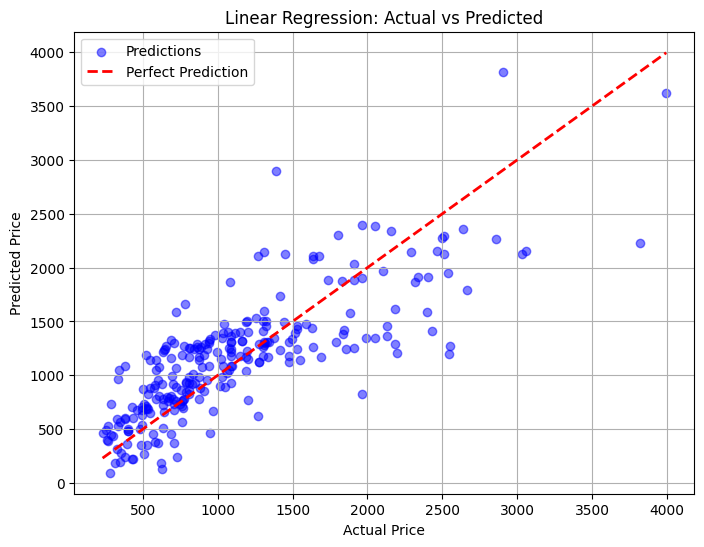

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

linear = LinearRegression()
linear.fit(X_train, y_train)
linearpred = linear.predict(X_test)
print(f"R-squared score: {r2_score(y_test, linear.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, linearpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, linearpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, linearpred):.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, linearpred, color='blue', label="Predictions", alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

lasso

R-squared score: 0.63
Mean Absolute Error (MAE): 303.11
Mean Squared Error (MSE): 165683.80
Root Mean Squared Error (RMSE): 407.04


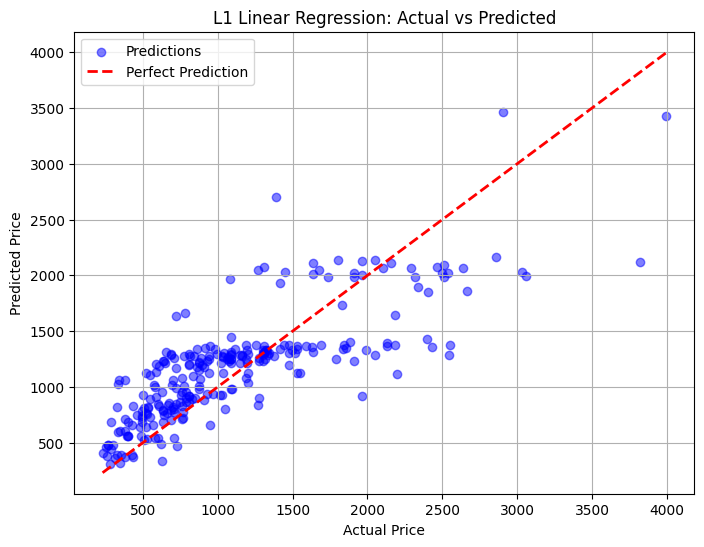

In [118]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=40)
lasso.fit(X_train, y_train)
lassopred = lasso.predict(X_test)
print(f"R-squared score: {r2_score(y_test, lasso.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, lassopred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lassopred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, lassopred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lassopred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("L1 Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

ridge

R-squared score: 0.64
Mean Absolute Error (MAE): 304.42
Mean Squared Error (MSE): 164740.12
Root Mean Squared Error (RMSE): 405.88


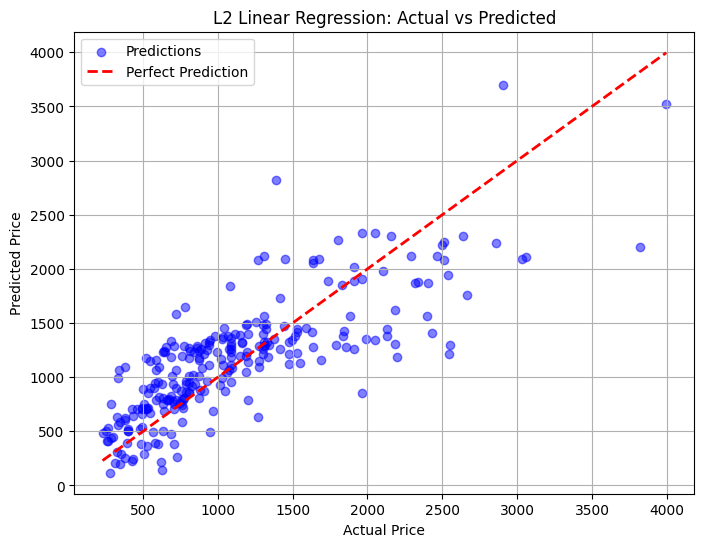

In [119]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)
ridgepred = ridge.predict(X_test)
print(f"R-squared score: {r2_score(y_test, ridge.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridgepred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, ridgepred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, ridgepred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridgepred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("L2 Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

In [50]:
# figuring out the best alpha value for ridge
als = [37, 38, 39, 40, 41, 42, 43, 44]
for a in als:
  kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
  model = Ridge(alpha=a)
  result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  print('a=', a, 'mean accuracy = %.2f%%' % (result_kfold.mean() * 100.0))

a= 37 mean accuracy = 61.69%
a= 38 mean accuracy = 61.69%
a= 39 mean accuracy = 61.69%
a= 40 mean accuracy = 61.69%
a= 41 mean accuracy = 61.69%
a= 42 mean accuracy = 61.69%
a= 43 mean accuracy = 61.69%
a= 44 mean accuracy = 61.69%


knn

R-squared score: 0.74
Mean Absolute Error (MAE): 239.08
Mean Squared Error (MSE): 118415.54
Root Mean Squared Error (RMSE): 344.12


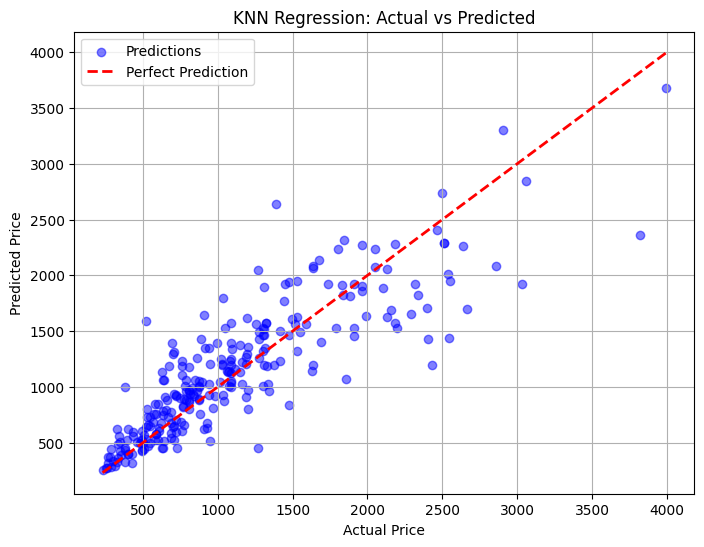

In [120]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(f"R-squared score: {r2_score(y_test, knnpred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, knnpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, knnpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, knnpred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knnpred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

In [52]:
ns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in ns:
  kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
  model = KNeighborsRegressor(n_neighbors=n)
  result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  print('n=', n, 'mean accuracy = %.2f%%' % (result_kfold.mean() * 100.0))

n= 2 mean accuracy = 70.80%
n= 3 mean accuracy = 71.77%
n= 4 mean accuracy = 71.87%
n= 5 mean accuracy = 71.92%
n= 6 mean accuracy = 71.52%
n= 7 mean accuracy = 71.41%
n= 8 mean accuracy = 70.56%
n= 9 mean accuracy = 70.14%
n= 10 mean accuracy = 69.44%


knn with weights

R-squared score: 0.8030129193130844
Mean Absolute Error (MAE): 201.86414781879864
Mean Squared Error (MSE): 88917.2954991009
Root Mean Squared Error (RMSE): 298.19003252808585


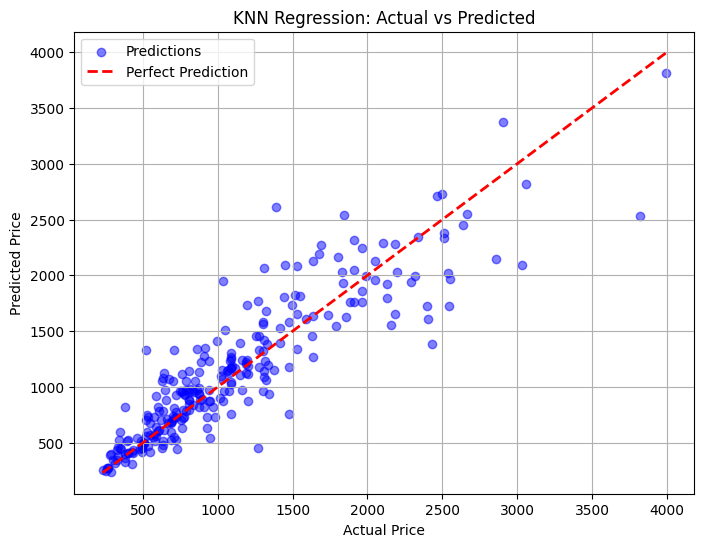

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
knnweighted = KNeighborsRegressor(p=1,n_neighbors=6,weights="distance")
knnweighted.fit(X_train, y_train)
knnweightedpred = knnweighted.predict(X_test)
print(f"R-squared score: {r2_score(y_test, knnweightedpred):}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, knnweightedpred):}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, knnweightedpred):}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, knnweightedpred):}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knnweightedpred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

In [54]:
ps = [1, 2, 3]
best_n = 7
for p in ps:
  kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
  model = KNeighborsRegressor(n_neighbors=best_n, p=p, weights='distance')
  result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  print('p=', p, 'mean accuracy = %.2f%%' % (result_kfold.mean() * 100.0))

p= 1 mean accuracy = 76.14%
p= 2 mean accuracy = 74.75%
p= 3 mean accuracy = 72.17%


decision tree

MAE: 211.65415779876557
MSE: 94135.09451565934
RMSE: 306.8144300968573
R² Score: 0.7914534247275423


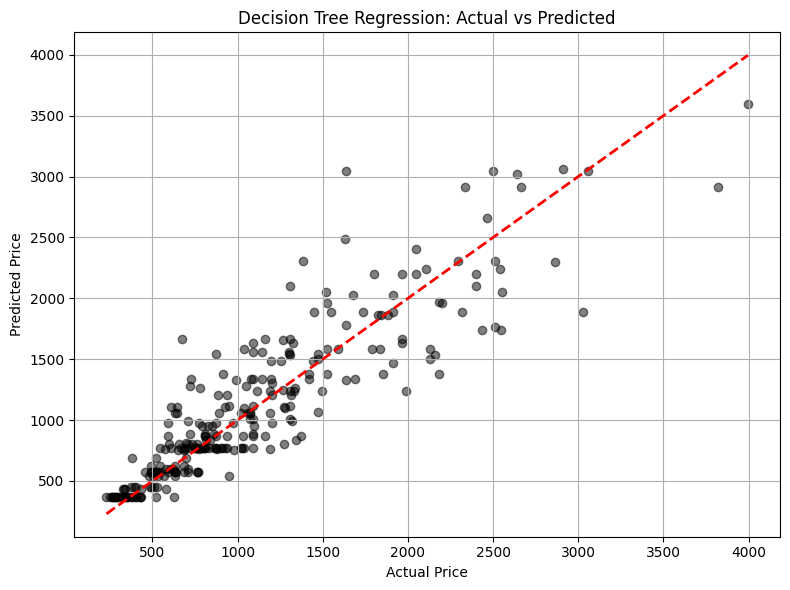

In [126]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth = 25,min_samples_leaf=5,max_leaf_nodes=92,random_state=42)
dtree.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dtreepred = dtree.predict(X_test)
mae = mean_absolute_error(y_test, dtreepred)
mse = mean_squared_error(y_test, dtreepred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dtreepred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dtreepred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
best_depth = 25
best_min_samples = 4
best_max_nodes = 107
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
model = DecisionTreeRegressor(max_depth=best_depth, min_samples_leaf=best_min_samples, max_leaf_nodes=best_max_nodes, random_state=42)
result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print('depth=', best_depth, 'min samples=', best_min_samples, 'max nodes=', best_max_nodes, 'mean accuracy = %.2f%%' % (result_kfold.mean() * 100.0))

depth= 25 min samples= 4 max nodes= 107 mean accuracy = 72.57%


Let's visualize our tree:

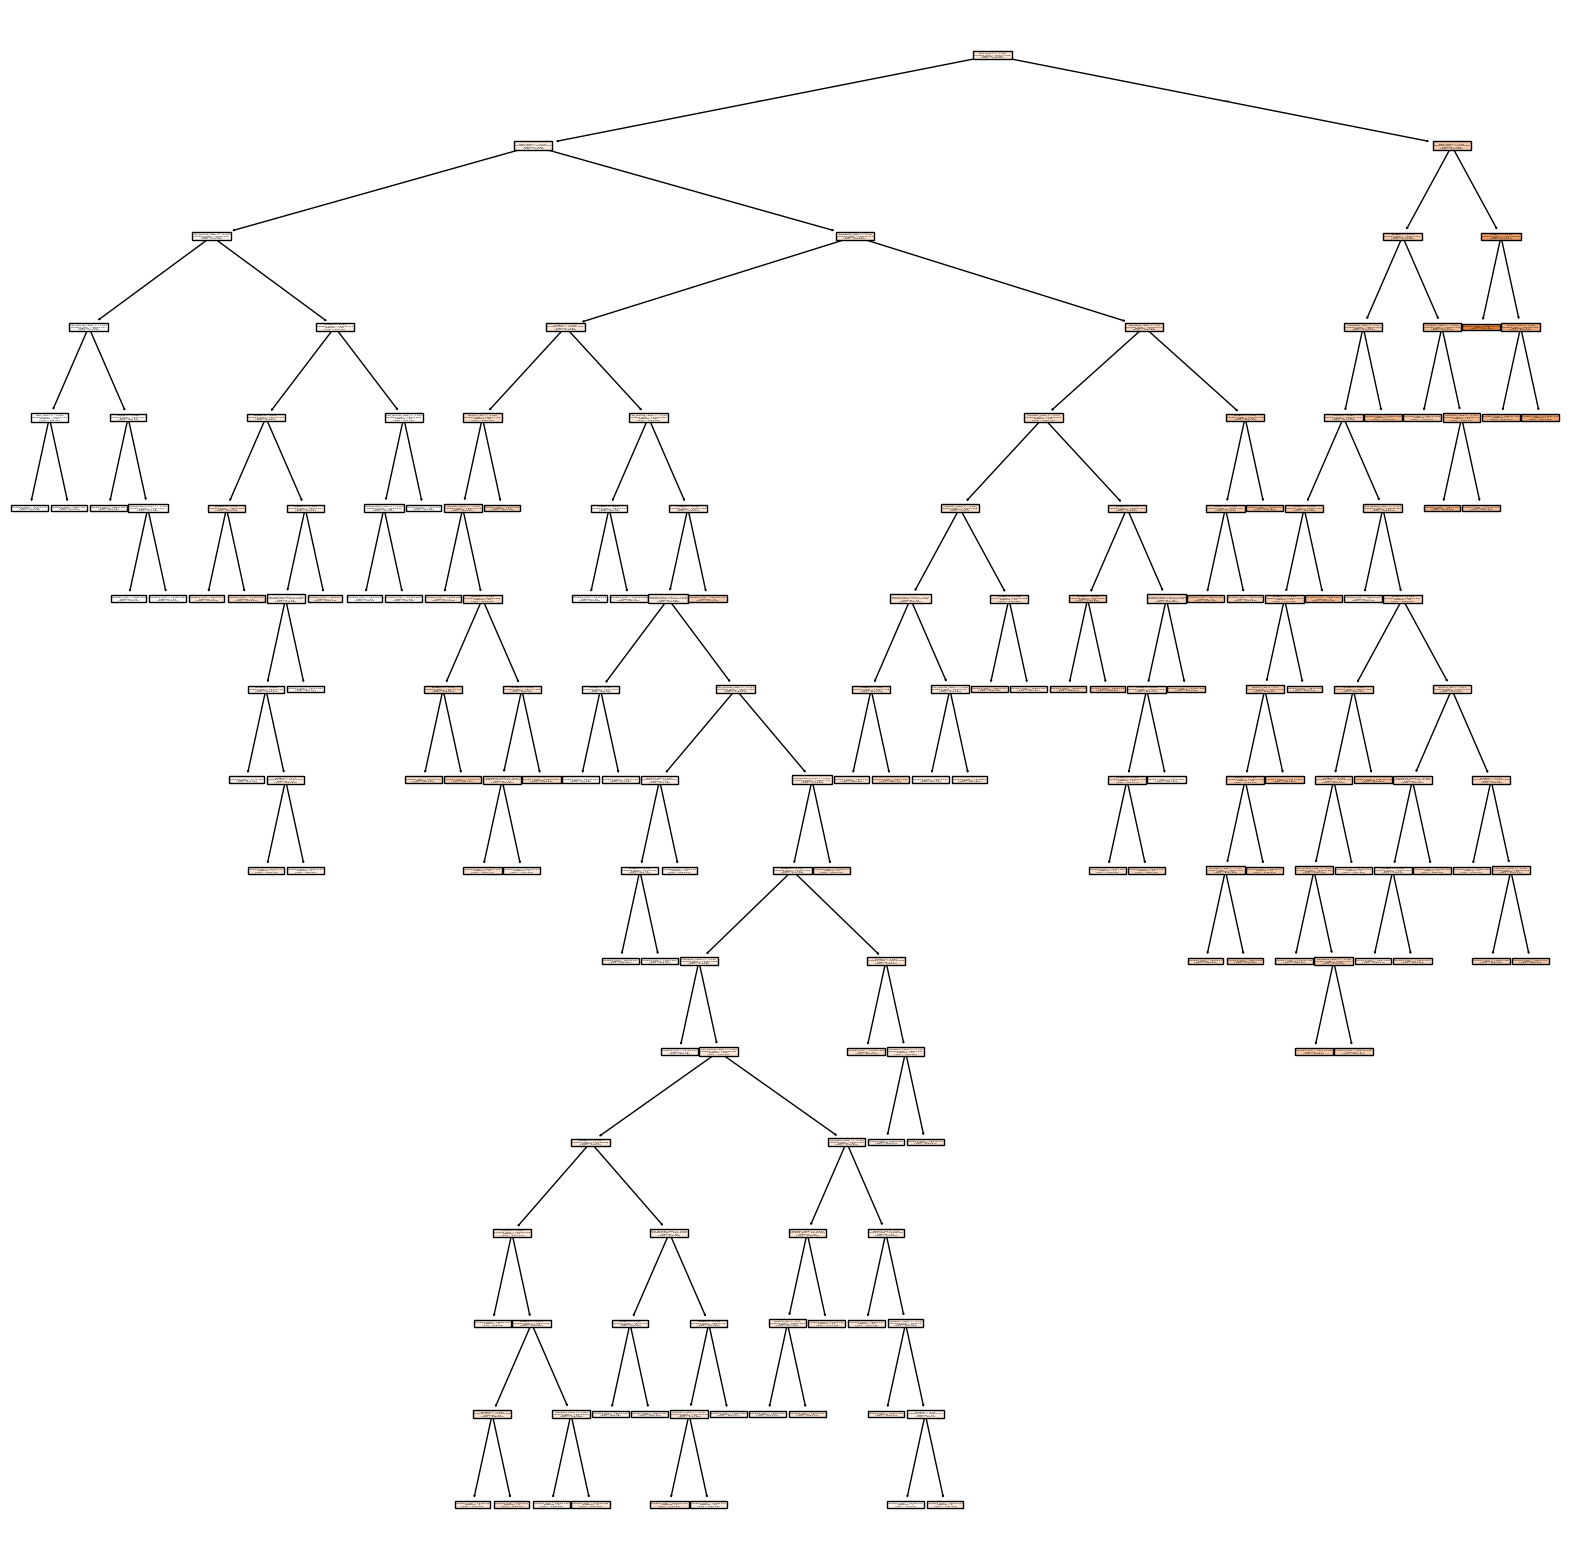

In [128]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True,feature_names=X.columns)
plt.show()

random forest

R-squared score: 0.83
Mean Absolute Error (MAE): 181.68
Mean Squared Error (MSE): 75710.43
Root Mean Squared Error (RMSE): 275.16


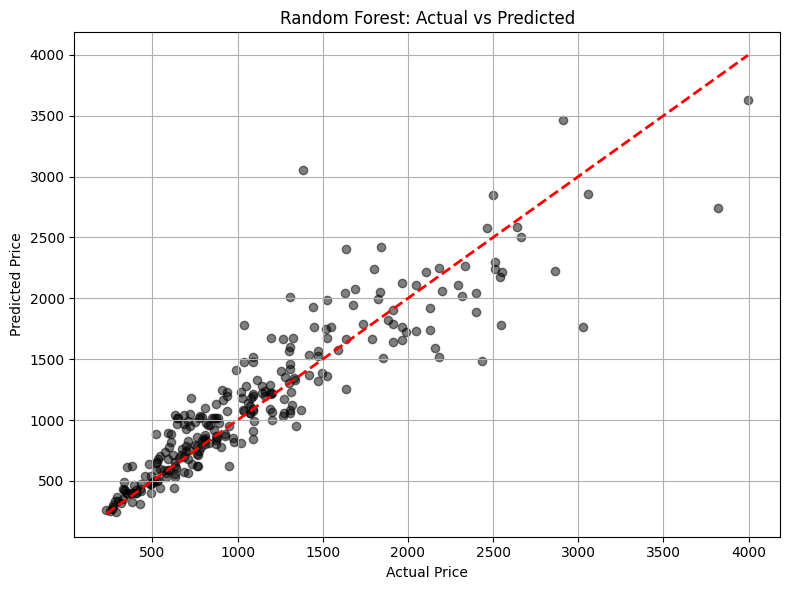

In [129]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 98, max_depth = 48, max_features = 3, random_state = 42)
forest.fit(X_train, y_train)
forestpred = forest.predict(X_test)
mae = mean_absolute_error(y_test, forestpred)
print(f"R-squared score: {r2_score(y_test, forestpred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, forestpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, forestpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, forestpred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forestpred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
estimators = [20, 50, 100]
depth = 40
mfeat = 2
for e in estimators:
  kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
  model = RandomForestRegressor(n_estimators=e, max_depth=depth, max_features=mfeat)
  result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  print('e=', e, 'depth=', depth, 'max features=', mfeat, 'mean accuracy=%.2f%%' % (result_kfold.mean() * 100.0))

e= 20 depth= 40 max features= 2 mean accuracy=78.22%
e= 50 depth= 40 max features= 2 mean accuracy=78.16%
e= 100 depth= 40 max features= 2 mean accuracy=78.84%


neural network

Iteration 1, loss = 1091676.78145239
Iteration 2, loss = 1079811.86130460
Iteration 3, loss = 1050738.40835863
Iteration 4, loss = 986441.95084714
Iteration 5, loss = 873821.67972567
Iteration 6, loss = 695585.23856796
Iteration 7, loss = 473335.95905479
Iteration 8, loss = 263849.48555383
Iteration 9, loss = 160505.78577538
Iteration 10, loss = 156769.78647519
Iteration 11, loss = 137278.82733430
Iteration 12, loss = 115790.09310181
Iteration 13, loss = 110318.69398406
Iteration 14, loss = 105113.35890354
Iteration 15, loss = 98656.32583246
Iteration 16, loss = 97891.89366957
Iteration 17, loss = 95957.01352302
Iteration 18, loss = 93950.69275607
Iteration 19, loss = 92746.04795432
Iteration 20, loss = 91700.72715084
Iteration 21, loss = 91063.89028441
Iteration 22, loss = 90316.67381786
Iteration 23, loss = 89476.80284984
Iteration 24, loss = 88702.36694701
Iteration 25, loss = 88066.48333404
Iteration 26, loss = 87422.95682347
Iteration 27, loss = 87035.47381137
Iteration 28, loss =

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


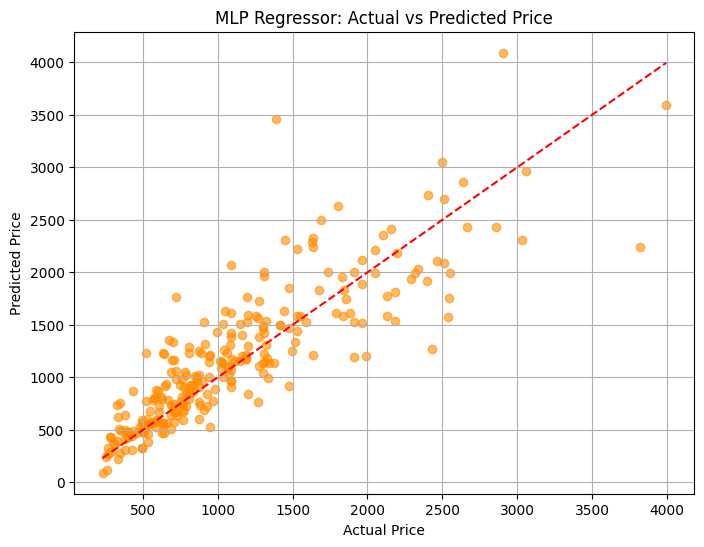

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mlp = MLPRegressor(hidden_layer_sizes=(100, 50),activation='relu',solver='adam',learning_rate_init=0.01,max_iter=500,random_state=42,verbose=True)
mlp.fit(X_train, y_train)
ypred = mlp.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)
print("Neural Network Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MLP Regressor: Actual vs Predicted Price")
plt.grid(True)
plt.show()

xgboost

R-squared score: 0.84
Mean Absolute Error (MAE): 174.57
Mean Squared Error (MSE): 74011.12
Root Mean Squared Error (RMSE): 272.05


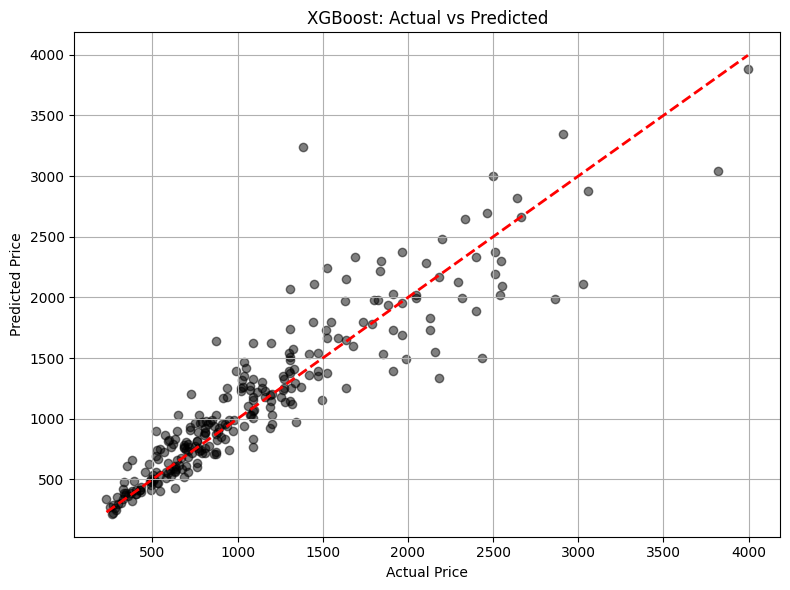

In [130]:
import xgboost as xgb
from xgboost import XGBRegressor
xgbo = XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=6, random_state=42)
xgbo.fit(X_train, y_train)
xgbpred = xgbo.predict(X_test)
print(f"R-squared score: {r2_score(y_test, xgbpred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, xgbpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, xgbpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, xgbpred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgbpred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

catboost

R-squared score: 0.85
Mean Absolute Error (MAE): 176.68
Mean Squared Error (MSE): 69525.73
Root Mean Squared Error (RMSE): 263.68


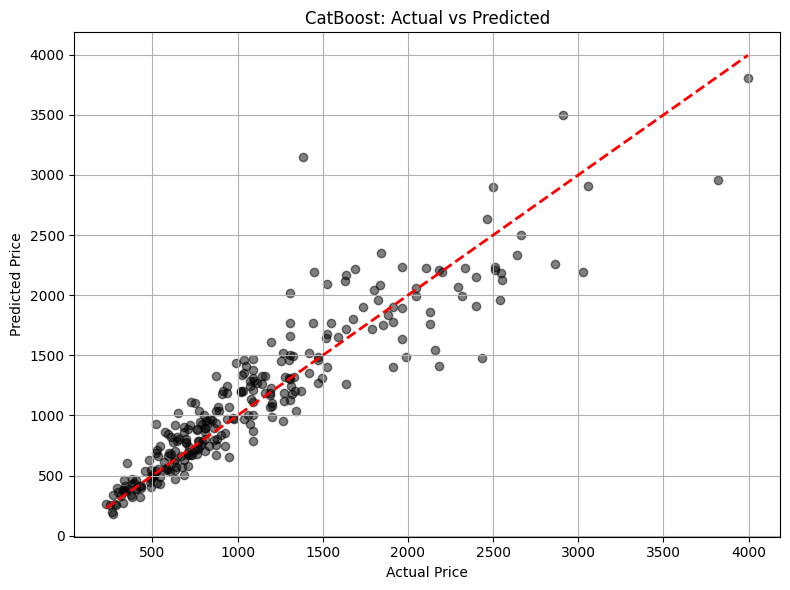

In [131]:
#!pip install catboost
import catboost as cb
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=800, learning_rate=0.1, depth=6, verbose=0)
cat.fit(X_train, y_train)
catpred = cat.predict(X_test)
print(f"R-squared score: {r2_score(y_test, catpred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, catpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, catpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, catpred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, catpred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('CatBoost: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

graph comparing models

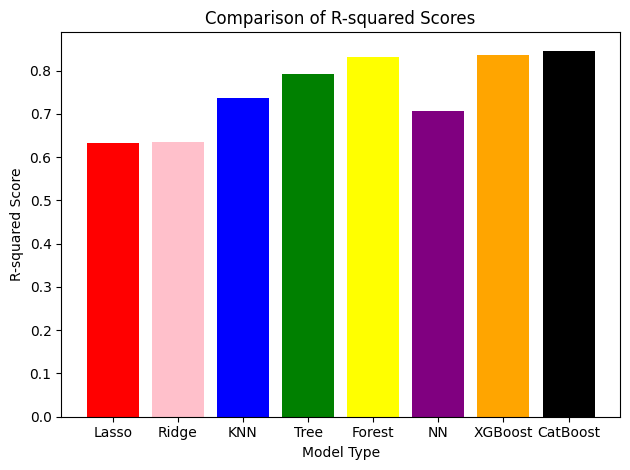

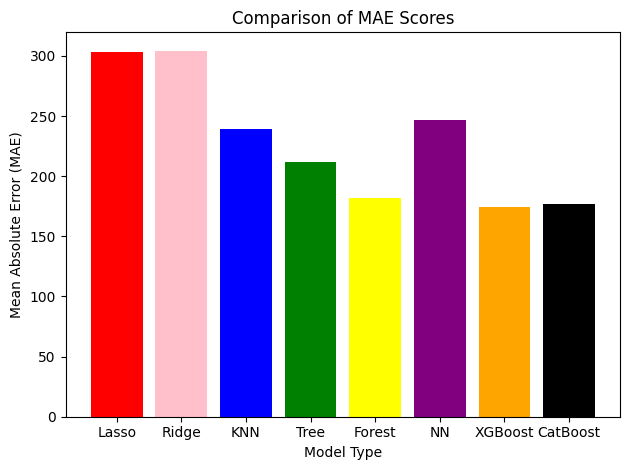

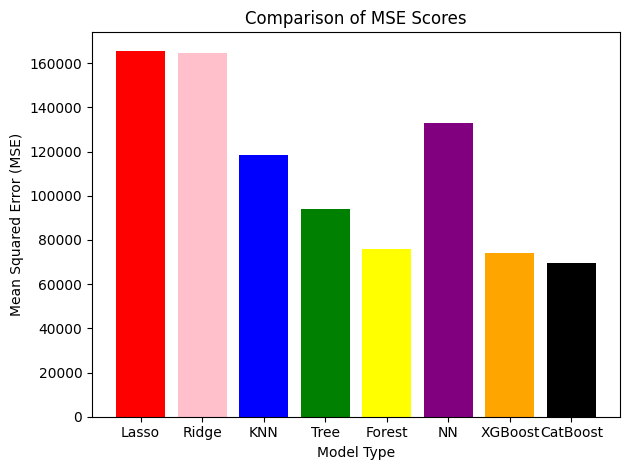

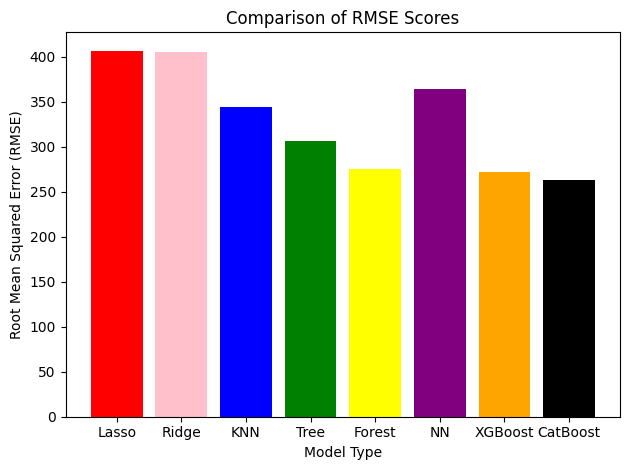

In [133]:
models = {"Lasso": lasso, "Ridge": ridge, "KNN": knn, "Tree": dtree, "Forest": forest,"NN": mlp, 'XGBoost': xgbo, 'CatBoost': cat}
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), r2_scores, color=["red", 'pink', "blue", "green", "yellow","purple", 'orange', 'black'])
plt.xlabel("Model Type")
plt.ylabel("R-squared Score")
plt.title("Comparison of R-squared Scores")
plt.tight_layout()
plt.show()

#This is the MAE comparison
mae_scores = [mean_absolute_error(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), mae_scores, color=["red", 'pink', "blue", "green", "yellow","purple", 'orange', 'black'])
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Scores")
plt.tight_layout()
plt.show()

#This is the MSE comparison
mse_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), mse_scores, color=["red", 'pink', "blue", "green", "yellow","purple", 'orange', 'black'])
plt.xlabel("Model Type")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of MSE Scores")
plt.tight_layout()
plt.show()

#This is the RMSE comparison
rmse_scores = [root_mean_squared_error(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), rmse_scores, color=["red", 'pink', "blue", "green", "yellow","purple", 'orange', 'black'])
plt.xlabel("Model Type")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of RMSE Scores")
plt.tight_layout()
plt.show()